In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_rows', 500)

housing_numeric = pd.read_pickle("housing_numeric.pkl")
housing_factor = pd.read_pickle("housing_factor.pkl")
housing_numeric['TotalSF'] = housing_numeric['TotalBsmtSF'] + housing_numeric['1stFlrSF'] + housing_numeric['2ndFlrSF']
housing_numeric['TotalBath'] = housing_numeric['BsmtFullBath'] + (housing_numeric['BsmtHalfBath']*0.5) + housing_numeric['FullBath'] + (housing_numeric['HalfBath']*0.5)
housing_factor['MixedExterior'] = housing_factor['Exterior1st'] + ' - ' + housing_factor['Exterior2nd']

housing = pd.concat([housing_numeric, housing_factor], axis=1)
SalePrice = housing['SalePrice']

In [5]:
housing_refined = housing[['MasVnrArea', 'BsmtQual', 'GarageArea', 'LotArea', 'GrLivArea', 'ExterQual', 
                           'BsmtFinSF1', 'LotFrontage', 'YearBuilt', 'Neighborhood', 'GarageType', 'OverallQual',
                           'TotRmsAbvGrd', 'YearRemodAdd', 'MSSubClass', 'OverallCond', 'BsmtExposure', 'TotalSF',
                           'TotalBath', 'MixedExterior', 'Fireplaces', 'KitchenQual', 'OpenPorchSF', 'WoodDeckSF', 'GarageYrBlt']].copy()
housing_refined.to_pickle('housing_refined.pkl')

housing_numeric_refined = housing[['MasVnrArea', 'GarageArea', 'LotArea', 'GrLivArea', 
                           'BsmtFinSF1', 'LotFrontage', 'YearBuilt', 'TotRmsAbvGrd', 'YearRemodAdd', 'OpenPorchSF', 'WoodDeckSF', 'TotalSF',
                           'TotalBath', 'Fireplaces', 'GarageYrBlt']].copy()

housing_factor_dummified2 = housing_refined[['BsmtQual', 'Neighborhood', 'GarageType', 'OverallQual', 'ExterQual', 
                                             'MSSubClass', 'OverallCond', 'BsmtExposure', 
                                             'MixedExterior', 'KitchenQual']].copy()

In [6]:
housing_refined

,MasVnrArea,BsmtQual,GarageArea,LotArea,GrLivArea,ExterQual,BsmtFinSF1,LotFrontage,YearBuilt,Neighborhood,...,OverallCond,BsmtExposure,TotalSF,TotalBath,MixedExterior,Fireplaces,KitchenQual,OpenPorchSF,WoodDeckSF,GarageYrBlt
1,0.0,TA,399.0,7890,856,TA,238.0,68.516053,1939,SWISU,...,6,No,1712.0,2.0,Wd Sdng - Wd Sdng,1,TA,0,0,1939.0
2,149.0,Gd,266.0,4235,1049,Gd,552.0,42.000000,1984,Edwards,...,5,Mn,2098.0,3.0,HdBoard - HdBoard,0,Gd,105,0,1984.0
3,0.0,TA,216.0,6060,1001,Gd,737.0,60.000000,1930,IDOTRR,...,9,No,1838.0,1.0,MetalSd - MetalSd,0,Gd,0,154,1930.0
4,0.0,Fa,281.0,8146,1039,Gd,0.0,80.000000,1900,OldTown,...,8,No,1444.0,1.0,MetalSd - MetalSd,0,TA,0,0,1940.0
5,0.0,Gd,528.0,8400,1665,Gd,643.0,70.000000,2001,NWAmes,...,6,No,2475.0,3.5,VinylSd - VinylSd,0,Gd,45,0,2001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,0.0,TA,192.0,8854,952,TA,0.0,68.516053,1916,BrkSide,...,6,No,1904.0,1.0,Wd Sdng - Wd Sdng,1,Fa,98,0,1916.0
760,0.0,NoBsmt,452.0,13680,1733,TA,0.0,68.516053,1955,Edwards,...,5,NoBsmt,1733.0,2.0,BrkFace - Wd Sdng,1,TA,0,0,1955.0
761,0.0,TA,871.0,6270,2002,TA,284.0,82.000000,1949,Crawfor,...,6,No,3003.0,2.0,MetalSd - MetalSd,0,TA,0,0,1949.0
762,144.0,Gd,486.0,8826,1842,Gd,841.0,68.516053,2000,CollgCr,...,5,No,2827.0,3.5,VinylSd - VinylSd,1,Gd,96,193,2000.0


In [7]:
label_encoder = LabelEncoder()

housing_factor_dummified2= housing_factor_dummified2.apply(label_encoder.fit_transform)

housing_factor_dummified2 = pd.get_dummies(housing_factor_dummified2, drop_first = True)
housing_factor_dummified2

,BsmtQual,Neighborhood,GarageType,OverallQual,ExterQual,MSSubClass,OverallCond,BsmtExposure,MixedExterior,KitchenQual
1,5,21,5,6,3,6,5,3,73,4
2,2,7,1,5,2,0,4,2,24,2
3,5,11,5,5,2,6,8,3,35,2
4,1,20,5,4,2,11,7,3,35,4
5,2,17,1,8,2,10,5,3,62,2
...,...,...,...,...,...,...,...,...,...,...
759,5,3,5,6,3,6,5,3,73,1
760,3,7,1,3,3,5,4,4,16,4
761,5,6,0,5,3,15,5,3,35,4
762,2,5,1,7,2,10,4,3,62,2


In [8]:
housing_factor_dummified2 = pd.concat([housing_numeric_refined, housing_factor_dummified2], axis=1)
housing_factor_dummified2

,MasVnrArea,GarageArea,LotArea,GrLivArea,BsmtFinSF1,LotFrontage,YearBuilt,TotRmsAbvGrd,YearRemodAdd,OpenPorchSF,...,BsmtQual,Neighborhood,GarageType,OverallQual,ExterQual,MSSubClass,OverallCond,BsmtExposure,MixedExterior,KitchenQual
1,0.0,399.0,7890,856,238.0,68.516053,1939,4,1950,0,...,5,21,5,6,3,6,5,3,73,4
2,149.0,266.0,4235,1049,552.0,42.000000,1984,5,1984,105,...,2,7,1,5,2,0,4,2,24,2
3,0.0,216.0,6060,1001,737.0,60.000000,1930,5,2007,0,...,5,11,5,5,2,6,8,3,35,2
4,0.0,281.0,8146,1039,0.0,80.000000,1900,6,2003,0,...,1,20,5,4,2,11,7,3,35,4
5,0.0,528.0,8400,1665,643.0,70.000000,2001,6,2001,45,...,2,17,1,8,2,10,5,3,62,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,0.0,192.0,8854,952,0.0,68.516053,1916,4,1950,98,...,5,3,5,6,3,6,5,3,73,1
760,0.0,452.0,13680,1733,0.0,68.516053,1955,8,1955,0,...,3,7,1,3,3,5,4,4,16,4
761,0.0,871.0,6270,2002,284.0,82.000000,1949,8,1950,0,...,5,6,0,5,3,15,5,3,35,4
762,144.0,486.0,8826,1842,841.0,68.516053,2000,7,2000,96,...,2,5,1,7,2,10,4,3,62,2


In [9]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(housing_factor_dummified2, SalePrice)

LinearRegression()

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 6.000e+00, 3.640e+02,
        2.087e+03, 1.060e+02, 8.000e+00, 7.000e+00]),
 array([-390218.92078175, -329141.32864629, -268063.73651083,
        -206986.14437537, -145908.5522399 ,  -84830.96010444,
         -23753.36796898,   37324.22416649,   98401.81630195,
         159479.40843741,  220557.00057287]),
 <BarContainer object of 10 artists>)

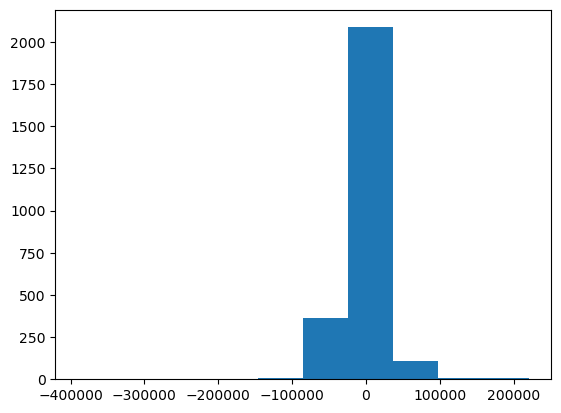

In [10]:
import matplotlib.pyplot as plt
residuals = SalePrice - lm.predict(housing_factor_dummified2)
plt.hist(residuals)

In [11]:
print('R^2 is equal to %.3f' %(lm.score(housing_factor_dummified2,SalePrice))) #By default, score gives R^2. 
print('RSS is equal to %.3f' %(np.sum(residuals**2)))
print('The intercept is %.3f' %(lm.intercept_))
print('The slopes are %s' %(lm.coef_))

R^2 is equal to 0.864
RSS is equal to 1974926235645.700
The intercept is -818081.175
The slopes are [ 3.29992195e+01  3.36828466e+01  5.15393255e-01  3.23117517e+01
  2.18457373e+01  1.37490521e+02  3.43048308e+02 -1.09025756e+03
  8.16851478e+01 -3.96402417e+00  9.13465975e+00  2.49042877e+01
 -2.24063243e+03  9.53759133e+03  1.52587055e+01 -3.52770850e+03
  9.62309180e+01  7.36673227e+02  2.69307970e+03 -1.66342521e+04
 -4.41109731e+01  7.63607747e+03 -2.50213460e+03  2.37697790e+01
 -5.51903609e+03]


In [12]:
print('negative slope column names %s' %(housing_factor_dummified2.columns[lm.coef_ < 0]))
print('positive slope column names %s' %(housing_factor_dummified2.columns[lm.coef_ > 0]))

negative slope column names Index(['TotRmsAbvGrd', 'OpenPorchSF', 'TotalBath', 'BsmtQual', 'ExterQual',
       'MSSubClass', 'BsmtExposure', 'KitchenQual'],
      dtype='object')
positive slope column names Index(['MasVnrArea', 'GarageArea', 'LotArea', 'GrLivArea', 'BsmtFinSF1',
       'LotFrontage', 'YearBuilt', 'YearRemodAdd', 'WoodDeckSF', 'TotalSF',
       'Fireplaces', 'GarageYrBlt', 'Neighborhood', 'GarageType',
       'OverallQual', 'OverallCond', 'MixedExterior'],
      dtype='object')


(array([1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 6.000e+00, 1.800e+01,
        3.420e+02, 1.924e+03, 2.640e+02, 2.300e+01]),
 array([-1.73599142, -1.50341381, -1.27083619, -1.03825857, -0.80568095,
        -0.57310333, -0.34052571, -0.10794809,  0.12462952,  0.35720714,
         0.58978476]),
 <BarContainer object of 10 artists>)

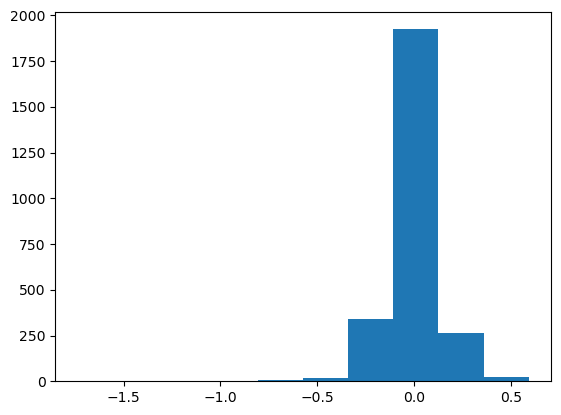

In [13]:
log_SalePrice = np.log(SalePrice) #Take log of DV
lm.fit(housing_factor_dummified2, log_SalePrice) #LM of log of DV
residuals = log_SalePrice - lm.predict(housing_factor_dummified2)
plt.hist(residuals)

In [14]:
print('R^2 is equal to %.3f' %(lm.score(housing_factor_dummified2,log_SalePrice))) #By default, score gives R^2. 
print('RSS is equal to %.3f' %(np.sum(residuals**2)))
print('The intercept is %.3f' %(lm.intercept_))
print('The slopes are %s' %(lm.coef_))

R^2 is equal to 0.886
RSS is equal to 43.998
The intercept is 3.346
The slopes are [ 2.47082149e-05  1.74281058e-04  2.29749726e-06  1.47254405e-04
  7.90274943e-05  6.90795985e-04  2.86288488e-03 -1.97690270e-03
  6.98828210e-04 -1.85595493e-06  6.33038063e-06  1.30304206e-04
  8.71247588e-03  5.09859557e-02  2.46215315e-04 -5.58247575e-03
  7.45924585e-06 -8.15756483e-03  4.41872117e-02 -3.40075642e-02
  1.09965388e-03  6.14917315e-02 -9.95463573e-03  3.77725932e-04
 -1.57339951e-02]


In [15]:
scores = {}
for idx, name1 in enumerate(housing_factor_dummified2.columns):
        myColumns = housing_factor_dummified2.columns[(idx+1):]
        pass

In [16]:
from itertools import combinations 

scores = {}

combos = combinations(housing_factor_dummified2.columns, 3)

for c in combos:
    X = housing_factor_dummified2[list(c)]
    Y = log_SalePrice
    reg = LinearRegression().fit(X,Y)
    scores[c] = reg.score (X,Y)

In [17]:
sorted(scores.items(), key=lambda features_score: abs(features_score [1]), reverse = True)

[(('YearBuilt', 'TotalSF', 'OverallCond'), 0.8102173161836371),
 (('YearBuilt', 'TotalSF', 'OverallQual'), 0.8004056504420405),
 (('YearRemodAdd', 'TotalSF', 'OverallQual'), 0.7956230078108323),
 (('YearBuilt', 'YearRemodAdd', 'TotalSF'), 0.7879893682252572),
 (('TotalSF', 'GarageYrBlt', 'OverallQual'), 0.7870770999023109),
 (('GarageArea', 'TotalSF', 'OverallQual'), 0.7856600743606889),
 (('TotalSF', 'TotalBath', 'OverallQual'), 0.7823134678140361),
 (('YearBuilt', 'TotalSF', 'Fireplaces'), 0.78131063613334),
 (('GarageArea', 'YearRemodAdd', 'TotalSF'), 0.7808342521537354),
 (('GarageArea', 'YearBuilt', 'TotalSF'), 0.7798041404853285),
 (('YearBuilt', 'TotalSF', 'KitchenQual'), 0.7797518222273571),
 (('TotalSF', 'BsmtQual', 'OverallQual'), 0.779045321719737),
 (('TotalSF', 'GarageType', 'OverallQual'), 0.7778096245515574),
 (('TotalSF', 'OverallQual', 'KitchenQual'), 0.7765627857940294),
 (('YearRemodAdd', 'TotalSF', 'GarageType'), 0.7765169020481625),
 (('BsmtFinSF1', 'TotalSF', 'Ove

In [18]:
import statsmodels.api as sm
x = sm.add_constant(housing_factor_dummified2)
model = sm.OLS(log_SalePrice, x.astype(float))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     796.2
Date:                Wed, 12 Jun 2024   Prob (F-statistic):               0.00
Time:                        03:58:37   Log-Likelihood:                 1591.2
No. Observations:                2580   AIC:                            -3130.
Df Residuals:                    2554   BIC:                            -2978.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.3460      0.418      8.007      0.000       2.527       4.165
MasVnrArea     2.471e-05   1.72e-05      1.434      0.152   -9.08e-06    5.85e-05
GarageArea        0.0002   1.71e-05     10.211      0.000       0.000       0.000
LotArea        2.297e-06   3.55e-07      6.474      0.000     1.6e-06    2.99e-06
GrLivArea         0.0001   1.61e-05      9.125      0.000       0.000       0.000
BsmtFinSF1     7.903e-05   8.35e-06      9.467      0.000    6.27e-05    9.54e-05
LotFrontage       0.0007      0.000      4.582      0.000       0.000       0.001
YearBuilt         0.0029      0.000     15.115      0.000       0.002       0.003
TotRmsAbvGrd     -0.0020      0.003     -0.638      0.524      -0.008       0.004
YearRemodAdd      0.0007      0.000      3.560      0.000       0.000       0.001
OpenPorchSF   -1.856e-06   4.26e-05     -0.044      0.965   -8.53e-05    8.16e-05
WoodDeckSF      6.33e-06    2.2e-05      0.288      0.773   -3.67e-05    4.94e-05
TotalSF           0.0001   9.09e-06     14.341      0.000       0.000       0.000
TotalBath         0.0087      0.005      1.618      0.106      -0.002       0.019
Fireplaces        0.0510      0.005     10.468      0.000       0.041       0.061
GarageYrBlt       0.0002      0.000      1.225      0.221      -0.000       0.001
BsmtQual         -0.0056      0.002     -2.589      0.010      -0.010      -0.001
Neighborhood   7.459e-06      0.000      0.019      0.984      -0.001       0.001
GarageType       -0.0082      0.002     -4.607      0.000      -0.012      -0.005
OverallQual       0.0442      0.003     17.258      0.000       0.039       0.049
ExterQual        -0.0340      0.006     -5.945      0.000      -0.045      -0.023
MSSubClass        0.0011      0.001      1.203      0.229      -0.001       0.003
OverallCond       0.0615      0.003     21.385      0.000       0.056       0.067
BsmtExposure     -0.0100      0.003     -3.713      0.000      -0.015      -0.005
MixedExterior     0.0004      0.000      2.769      0.006       0.000       0.001
KitchenQual      -0.0157      0.003     -5.280      0.000      -0.022      -0.010
==============================================================================
Omnibus:                     1282.368   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47993.892
Skew:                          -1.686   Prob(JB):                         0.00
Kurtosis:                      23.859   Cond. No.                     2.18e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+06. This might indicate that there are
strong multicollinearity or other numerical problem

In [19]:
pValues = results.pvalues
print('The significant coefficients')
pValues[pValues < .05].sort_values()

The significant coefficients


OverallCond      1.814289e-93
OverallQual      3.270585e-63
YearBuilt        1.677427e-49
TotalSF          6.382417e-45
Fireplaces       3.860264e-25
GarageArea       5.097195e-24
BsmtFinSF1       6.307434e-21
GrLivArea        1.419740e-19
const            1.774230e-15
LotArea          1.142200e-10
ExterQual        3.148558e-09
KitchenQual      1.399883e-07
GarageType       4.279913e-06
LotFrontage      4.831742e-06
BsmtExposure     2.095022e-04
YearRemodAdd     3.781898e-04
MixedExterior    5.670407e-03
BsmtQual         9.672514e-03
dtype: float64

In [20]:
print('The insignificant coefficients')
pValues[pValues > .05]

The insignificant coefficients


MasVnrArea      0.151747
TotRmsAbvGrd    0.523517
OpenPorchSF     0.965231
WoodDeckSF      0.773077
TotalBath       0.105733
GarageYrBlt     0.220629
Neighborhood    0.984448
MSSubClass      0.229175
dtype: float64